In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import  matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head(50)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
train_df.shape

(159571, 8)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
train_df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [6]:
train_df.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [7]:
percent_missing = train_df.isnull().sum() * 100 / len(train_df)
percent_missing

id                  0.0
comment_text        0.0
malignant           0.0
highly_malignant    0.0
rude                0.0
threat              0.0
abuse               0.0
loathe              0.0
dtype: float64

### Data Visualization

<AxesSubplot:>

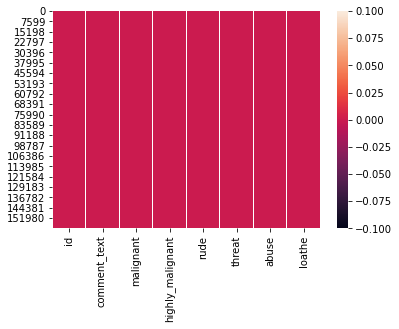

In [8]:
sns.heatmap(train_df.isnull())

In [9]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import joblib

In [10]:
test_df = pd.read_csv('test.csv')
test_df.head(50)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [11]:
test_df.shape

(153164, 2)

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [13]:
percent_missing = test_df.isnull().sum() * 100 / len(test_df)
percent_missing

id              0.0
comment_text    0.0
dtype: float64

<AxesSubplot:>

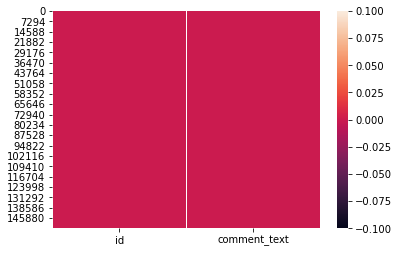

In [14]:
sns.heatmap(test_df.isnull())

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


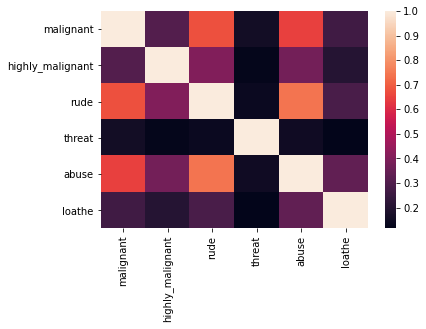

In [15]:
print(train_df.corr())
print(sns.heatmap(train_df.corr()))

In [16]:
train_df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant
0    144277
1     15294
Name: malignant, dtype: int64


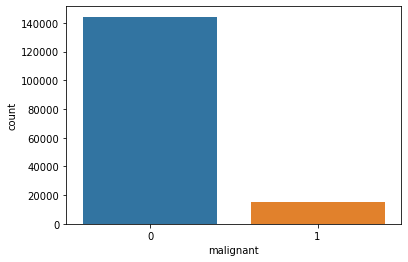

highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


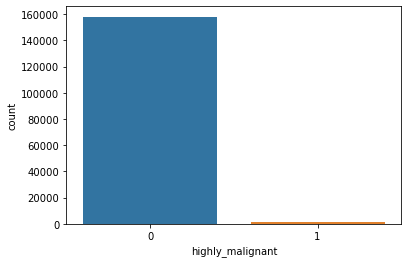

rude
0    151122
1      8449
Name: rude, dtype: int64


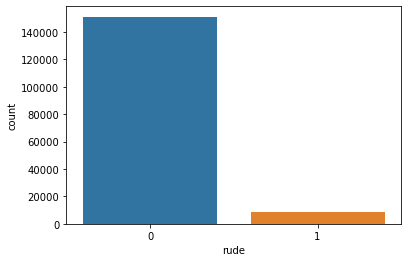

threat
0    159093
1       478
Name: threat, dtype: int64


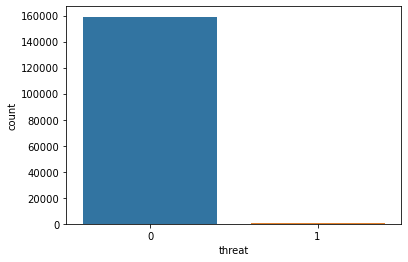

abuse
0    151694
1      7877
Name: abuse, dtype: int64


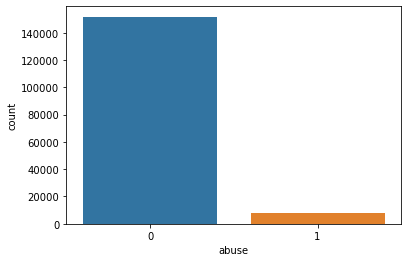

loathe
0    158166
1      1405
Name: loathe, dtype: int64


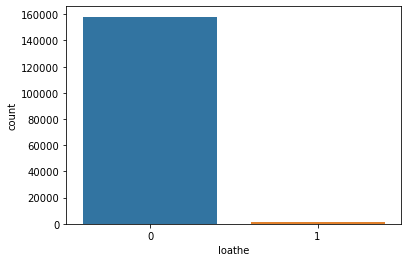

In [17]:
 col = ['malignant','highly_malignant','rude','threat','abuse','loathe']
 for i in col:
   print(i)
   print(train_df[i].value_counts())
   sns.countplot(train_df[i])
   plt.show()


In [18]:
malignant = list(train_df.malignant)
highly_malignant = list(train_df.highly_malignant)
rude = list(train_df.rude)
threat= list(train_df.threat)
abuse = list(train_df.abuse)
loathe = list(train_df.loathe)

In [19]:
# Adding all the outputs. If the sum is 0 indicating non-offensive comments and sum > 0 indicating malignant comments
Target = []
for i,j,k,l,m,n in zip(malignant,highly_malignant,rude,threat,abuse,loathe):
    Target.append(i+j+k+l+m+n) 

In [20]:
from collections import Counter
print(dict(Counter(Target)))

{0: 143346, 4: 1760, 1: 6360, 3: 4209, 2: 3480, 5: 385, 6: 31}


Here we can see that the dataset contains mostly outputs with 0 i.e. non-malignant comments and if Target > 1 indicating that the comment falls in more than one category such as rude, malignant, loathe, abuse etc

In [21]:
#Changing Target with value more than 1 into 1 so that we have a binary classification problem:- malignant or non-malignant
Target2= []
for i in Target:
    if i == 0:
        Target2.append(0)
    else:
        Target2.append(1)

In [22]:
print(dict(Counter(Target2)))

{0: 143346, 1: 16225}


Here Label "1" are offensive comments and "0" are non-offensive

In [23]:
# Defining Function for Word Clouds
def Word_Cloud(str_List):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in str_List:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "


    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [24]:
train_df["Target"] = Target2

In [25]:
train_df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'Target'],
      dtype='object')

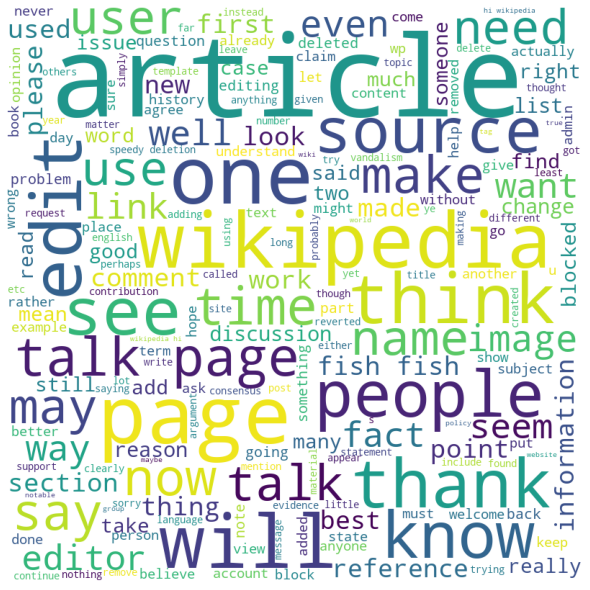

In [26]:
#Plotting Word Cloud using the function defined for a sample of non-malignant comments with Target = 0
Word_Cloud(list(train_df[train_df.Target == 0].sample(n=15000).comment_text))
#Taking only 15000 samples for the plot since Target=0 has 143346 records which will take huge processing time for the plot

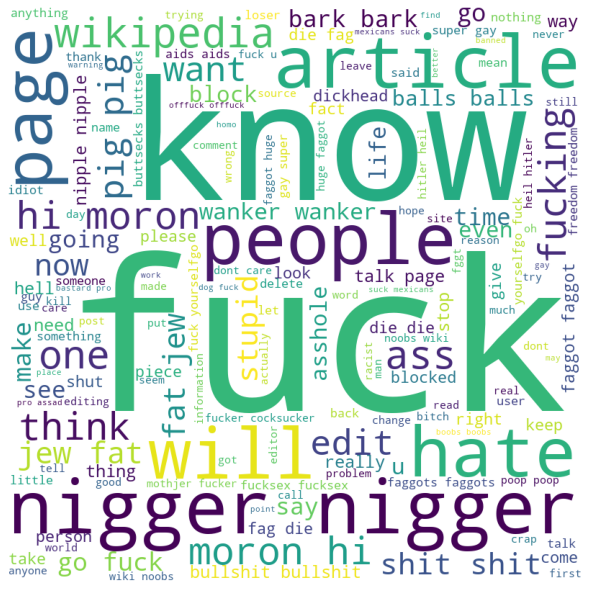

In [27]:
# Plotting the Word-Cloud for all the malignant comments
Word_Cloud(list(train_df[train_df.Target != 0].comment_text))

In [28]:
Malignant_Columns = ['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']

In [29]:
# Printing Count for all types of Offensive comments in the Dataset
for cols in Malignant_Columns:
    print("Comment_Type :",str(cols).upper())
    print("Count of such comments in the Dataset :", len(train_df[train_df[cols] != 0]))
    print()

Comment_Type : MALIGNANT
Count of such comments in the Dataset : 15294

Comment_Type : HIGHLY_MALIGNANT
Count of such comments in the Dataset : 1595

Comment_Type : RUDE
Count of such comments in the Dataset : 8449

Comment_Type : THREAT
Count of such comments in the Dataset : 478

Comment_Type : ABUSE
Count of such comments in the Dataset : 7877

Comment_Type : LOATHE
Count of such comments in the Dataset : 1405



Comment_Type : MALIGNANT     Count : 15294


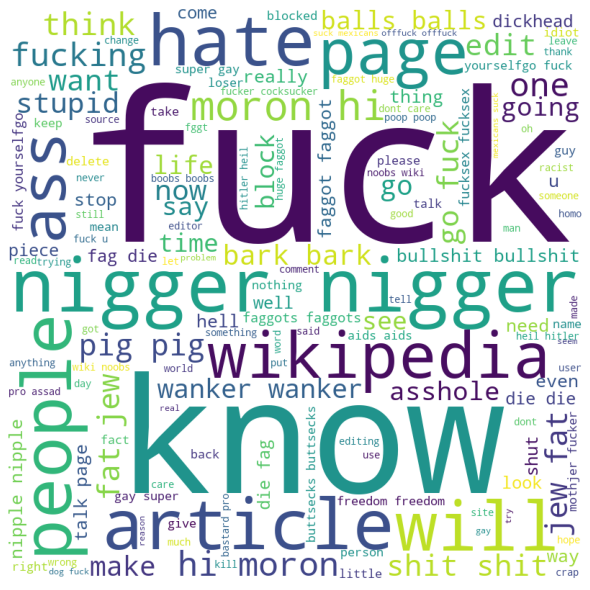

___________________________________________________________

Comment_Type : HIGHLY_MALIGNANT     Count : 1595


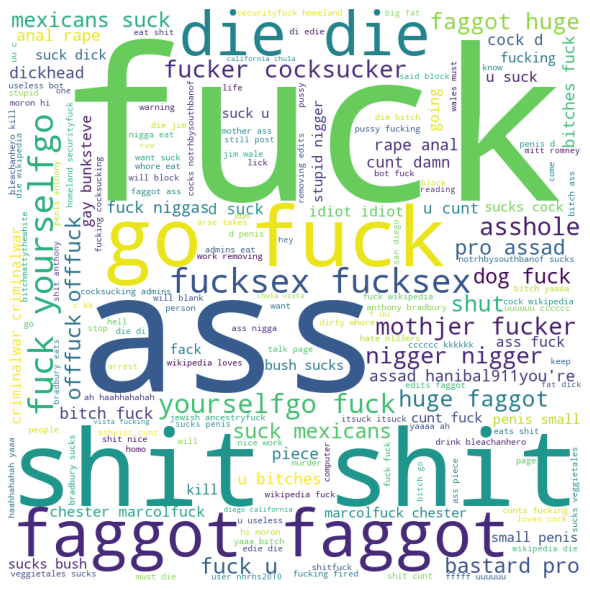

___________________________________________________________

Comment_Type : RUDE     Count : 8449


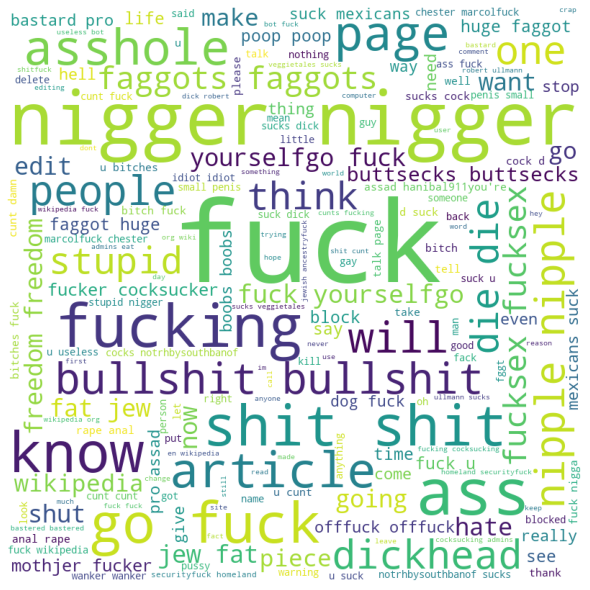

___________________________________________________________

Comment_Type : THREAT     Count : 478


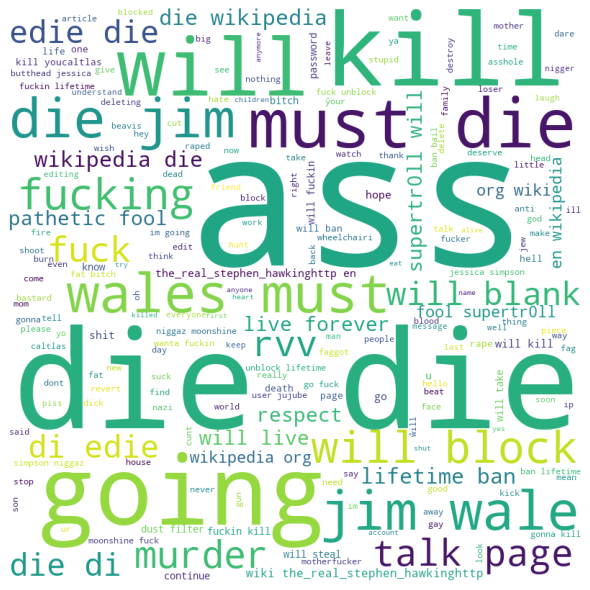

___________________________________________________________

Comment_Type : ABUSE     Count : 7877


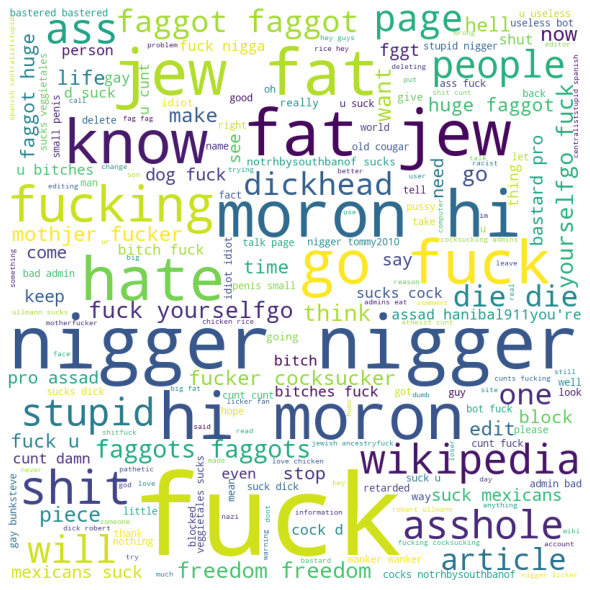

___________________________________________________________

Comment_Type : LOATHE     Count : 1405


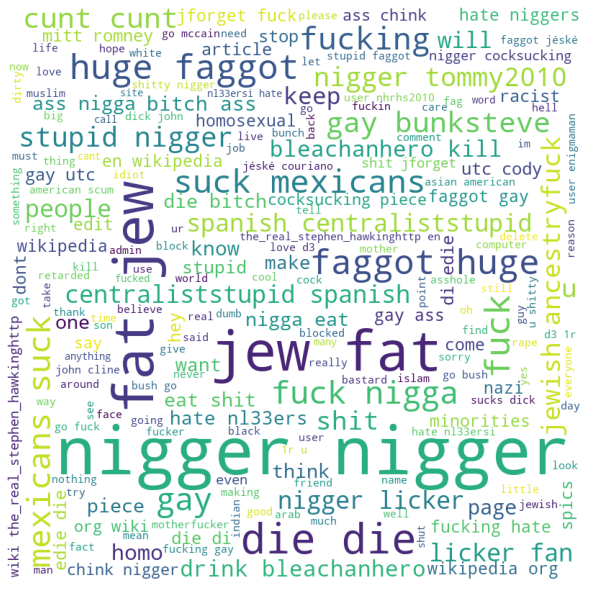

___________________________________________________________



In [30]:
# Plotting Word Cloud for all types of Offensive comments
for cols in Malignant_Columns:
    print("Comment_Type :",str(cols).upper(),"    Count :",len(train_df[train_df[cols] != 0]))
    Word_Cloud(list(train_df[train_df[cols] != 0].comment_text))
    print("___________________________________________________________")
    print()

### Testing models 

In [31]:
# Defining Input data and Output to be predicted
X = train_df.comment_text
y = train_df.Target

In [32]:
# Splitting the train_df into training and validation dataset
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=88)

### Using TF-IDF to convert text data into numerical format for Machine Learning Models

In [33]:
vectorizer = TfidfVectorizer(min_df =1,stop_words='english',use_idf=True,analyzer='word',
                             ngram_range=(1,1),max_features=15000)
x_train = vectorizer.fit_transform(X_train)
x_val  = vectorizer.transform(X_val)

### Logistic Regression Model 

In [34]:
logisticRegr = LogisticRegression(solver='liblinear',class_weight='balanced',random_state=5,tol=0.001,max_iter=1000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=5,
                   solver='liblinear', tol=0.001)

In [35]:
prediction = logisticRegr.predict(x_val)

In [36]:
print('\n','CONFUSION MATRIX','\n',confusion_matrix(y_val, prediction))
print('\n','ACCURACY','\n',accuracy_score(y_val, prediction))
print('\n','REPORT','\n',classification_report(y_val,prediction))


 CONFUSION MATRIX 
 [[27300  1431]
 [  426  2758]]

 ACCURACY 
 0.9418141939526868

 REPORT 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     28731
           1       0.66      0.87      0.75      3184

    accuracy                           0.94     31915
   macro avg       0.82      0.91      0.86     31915
weighted avg       0.95      0.94      0.95     31915



### Ada Boost Classifier

In [37]:
ada = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.01)
ada.fit(x_train,y_train)  

AdaBoostClassifier(learning_rate=0.01)

In [38]:
predictions2 = ada.predict(x_val)

In [39]:
print('\n','CONFUSION MATRIX','\n',confusion_matrix(y_val, predictions2))
print('\n','ACCURACY','\n',accuracy_score(y_val, predictions2))
print('\n','REPORT','\n',classification_report(y_val,predictions2))


 CONFUSION MATRIX 
 [[28717    14]
 [ 2667   517]]

 ACCURACY 
 0.9159956133479555

 REPORT 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     28731
           1       0.97      0.16      0.28      3184

    accuracy                           0.92     31915
   macro avg       0.94      0.58      0.62     31915
weighted avg       0.92      0.92      0.89     31915



### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=None,class_weight='balanced')
rf.fit(x_train, y_train)

In [ ]:
prediction3 = rf.predict(x_val)

In [ ]:
print('\n','CONFUSION MATRIX','\n',confusion_matrix(y_val, prediction3))
print('\n','ACCURACY','\n',accuracy_score(y_val, prediction3))
print('\n','REPORT','\n',classification_report(y_val,prediction3))

Since it is an Unbalanced Dataset even though Random Forest Model has showed highest Accuracy the Logistic Regression Model is better with a higher F1 score. So we can take this model as the Final Model

### Applying pre-processing to Test Dataset

In [ ]:
test_df = pd.read_csv("test.csv") 

In [ ]:
test_df.isnull().sum()

In [ ]:
test_df

In [ ]:
# Taking input data from the Dataset 
X_test = test_df.comment_text   

In [ ]:
# Using same vectorizer modelled on the trained Dataset to convert into TF-IDF
x_test = vectorizer.transform(X_test)

In [ ]:
# Using Best Model for Prediction 
Final_pred = rand.predict(x_test)

In [ ]:
Label = []
for i in Final_pred:
    if i == 0:
        Label.append("Not Malignant")
    else:
        Label.append("Malignant")
        

In [ ]:
test_df['Label'] = Label

### Predictive Model 

In [ ]:
print('Count of Malignant comments  in the Test Dataset :',len(test_df[test_df['Label']=="Malignant"]))
Word_Cloud(list(test_df[test_df['Label']=="Malignant"].comment_text))

In [ ]:
# Huge number of non-malignant comments
test_df[test_df["Label"] == "Not Malignant"]

In [ ]:
print("Count of Non Malignant Comments in the Test Dataset:",len(test_df[test_df['Label']== "Not Malignant"]))
Word_Cloud(list(test_df[test_df["Label"]== "Not Malignant"].sample(n = 20000).comment_text))

From the Word Clouds plotted it is clear that the Machine Learning Model is able to classify the comments into Malignant and Non-malignant ones even when Test Dataset is given has input.

In [ ]:
joblib.dump(prediction3,"Model")